# Clustering 
Using the 3 first components of the PCA, and trying to cluster the observations based on these 3 dimensions

source (example): https://realpython.com/k-means-clustering-python/

In [1]:
#libraries imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt
import random
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
#pip install kneed
from kneed import KneeLocator

####  Setting up

In [2]:
df1 = pd.read_excel("pca_full_v2.xlsx")

In [3]:
#to avoid reloading the dataset everytime I want to clear the Kernel
df = df1.copy()

In [4]:
df.rename({"principalcomponent1": "C1", "principalcomponent2": "C2", "principalcomponent3": "C3", "principalcomponent4":"C4", "principalcomponent5":"C5"}, axis="columns", inplace=True)

In [5]:
dflater = df[df["year"]!=2020]
df = df[df["year"]==2020]

# Exploration of different clustering methods with 2 components

### Two components together account for almost 25% of the variance of the dataset.

Counter intuitive, the best model is K-means with 2 components, although visually it seems like it would be DBSCAN clustering

## K-means with 2 components

In [6]:
dffeatures = df[['C1', 'C2']]

In [7]:
sc = StandardScaler()
dffeatures_Sc = sc.fit_transform(dffeatures)

chosing the number of clusters when there are 2 components

In [8]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dffeatures_Sc)
    sse.append(kmeans.inertia_)

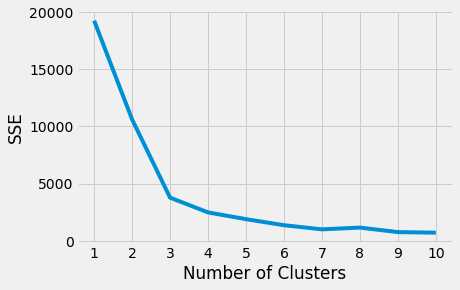

In [9]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

clearly need 3 clusters, when 2 components are used

In [10]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=1000,
max_iter=1000,
random_state=42
)

In [11]:
kmeans.fit(dffeatures_Sc)

KMeans(init='random', max_iter=1000, n_clusters=3, n_init=1000, random_state=42)

In [12]:
kmeans.cluster_centers_

array([[-0.5597511 ,  0.42765695],
       [ 0.317702  , -1.20853501],
       [ 2.697032  ,  1.48033783]])

plotting

In [13]:
kmeans.labels_

array([0, 0, 1, ..., 2, 2, 1])

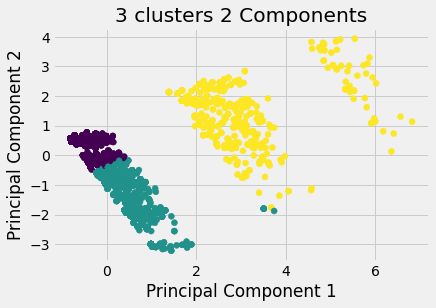

In [14]:
plt.scatter(dffeatures_Sc[:, 0], dffeatures_Sc[:, 1], c=kmeans.labels_)
plt.title("3 clusters 2 Components")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc=9)
plt.show()

In [15]:
#silhouette measure of performance of the clustering method
# drwback: "Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.""
#but other measures such as Calinski-Harabasz Index, Davies-Bouldin Index have the same caveat
silhouette_score(dffeatures_Sc, kmeans.labels_, metric='euclidean')

0.6892207881366189

## Gaussian Mixture model on clustering 2 components into 3 clusters

In [16]:
gmm = GaussianMixture(n_components=3)
gmm.fit(dffeatures_Sc)

GaussianMixture(n_components=3)

In [17]:
#predictions from gmm
labels = gmm.predict(dffeatures_Sc)
frame = pd.DataFrame(dffeatures_Sc)
frame['cluster'] = labels
frame.columns = ['C1', 'C2', 'cluster']

In [18]:
frame['cluster'].value_counts()

1    5561
0    3234
2     839
Name: cluster, dtype: int64

In [19]:
frame.columns

Index(['C1', 'C2', 'cluster'], dtype='object')

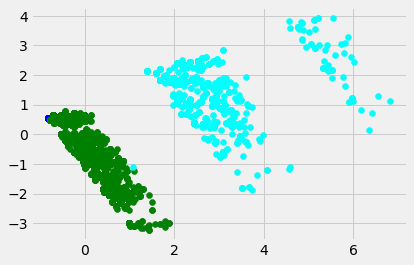

In [20]:
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["C1"],data["C2"],c=color[k])
plt.show()

In [21]:
#silhouette measure of performance of the clustering method
silhouette_score(dffeatures_Sc, labels, metric='euclidean')

0.3523436755849072

## Spectral Clustering on 2 components into 3 clusters

In [22]:
sc = SpectralClustering(n_clusters=4).fit(dffeatures_Sc)

In [23]:
labels = sc.labels_

In [24]:
#labels = sc.predict(dffeatures_Sc)
frame = pd.DataFrame(dffeatures_Sc)
frame['cluster'] = labels
frame.columns = ['C1', 'C2', 'cluster']

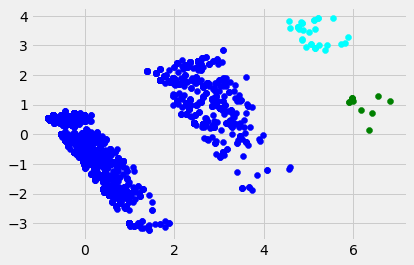

In [25]:
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["C1"],data["C2"],c=color[k])
plt.show()

In [26]:
#silhouette measure of performance of the clustering method
silhouette_score(dffeatures_Sc, sc.labels_, metric='euclidean')

0.7308689253650588

## DBSCAN clustering on 2 components into 3 clusters

In [27]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(dffeatures_Sc)

In [28]:
labels = clustering.labels_

In [29]:
frame = pd.DataFrame(dffeatures_Sc)
frame['cluster'] = labels
frame.columns = ['C1', 'C2', 'cluster']

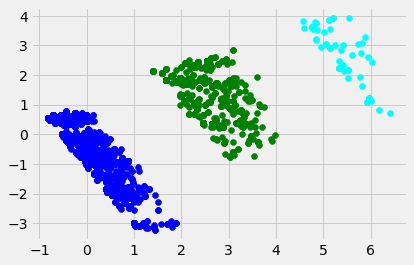

In [30]:
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["C1"],data["C2"],c=color[k])
plt.show()

In [31]:
#silhouette measure of performance of the clustering method
silhouette_score(dffeatures_Sc, clustering.labels_, metric='euclidean')

0.6503793372333003

## Clustering with 3 components

With three components from the PCA, we capture 35% of the variance of the dataset

In [32]:
dffeatures = df[['C1', 'C2', "C3"]]

In [33]:
sc = StandardScaler()
dffeatures_Sc = sc.fit_transform(dffeatures)

## DBSCAN with 3 components (4 clusters)

#### Hyperparameter tuning

Text(0, 0.5, 'Distance')

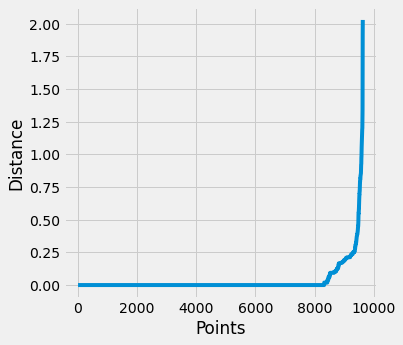

In [34]:
#tuning epsilon
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(dffeatures_Sc)
distances, indices = neighbors.kneighbors(dffeatures_Sc)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
#plt.savefig("Distance_curve.png", dpi=300)

visually, looks like e=0.25 could be good. The algo suggest e=0.038

Optimizing using a combination of min and eps. --> put in comments because runs for way too long.

range_min = [x for x in range(2, 51, 4)]
#range_eps = [x / 100.0 for x in range(1, 51, 4)]
range_eps = [x / 100.0 for x in range(1, 51, 4)] + [y / 10.0 for y in range(1, 51, 4)] + [round(z, 2) for z in np.arange(1.10, 1.31, 0.01)]
dic = {}
for m in range_min:

    for e in range_eps:

        model_1 = DBSCAN(eps = e, min_samples = m).fit(dffeatures_Sc)

        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)

        core_samples_mask[model_1.core_sample_indices_] = True
        labels = model_1.labels_

        if len( set(labels) ) > 1:

            silhouette_Avg = silhouette_score(dffeatures_Sc, labels)

            if silhouette_Avg > 0:

                dic[str(m) + " - " + str(e)] = silhouette_Avg

                print("min-sample value is: " + str(m) + " eps value is: " + str(e) , "The avearge silhouette_score is :",                               silhouette_Avg)
                max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])

##### Implementation of the model
Using the "optimal" hyperparameters from the above loop: eps=0.05 , min_samples=2 for a silhouette score of  0.9319466918933899

In [35]:
clustering = DBSCAN(eps=0.05, min_samples=2).fit(dffeatures_Sc)

In [36]:
labels = clustering.labels_

In [37]:
frame = pd.DataFrame(dffeatures_Sc)
frame['cluster'] = labels
frame.columns = ['C1', 'C2', "C3",'cluster']

In [38]:
#silhouette measure of performance of the clustering method
silhouette_score(dffeatures_Sc, clustering.labels_, metric='euclidean')

0.9319501312978908

In [39]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_
# there are 321 clusters

321

It is impossible with DBSCAN to set a maximum number of clusters.
With the optimal hyperparameters suggested, the number of clusters is 321, which is useless.
WIth other parameters that I tested, again there are too many clusters.
DBSCAN is hence maybe not suited for this exercise with 3 components.

## K-means with 3 components (4 clusters)

Leads to a quite low silhouette score

chosing the number of clusters

In [40]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dffeatures_Sc)
    sse.append(kmeans.inertia_)

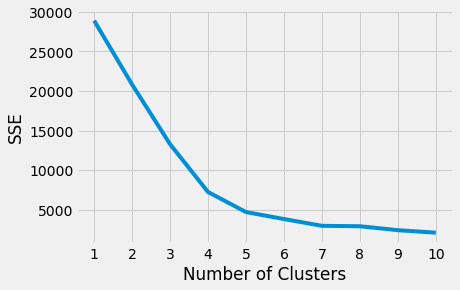

In [41]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [42]:
kmeans = KMeans(
init="random",
n_clusters=4,
n_init=500,
max_iter=300,
random_state=42
)

In [43]:
kmeans.fit(dffeatures_Sc)

KMeans(init='random', n_clusters=4, n_init=500, random_state=42)

In [44]:
centers = kmeans.cluster_centers_

In [45]:
#silhouette measure of performance of the clustering method
silhouette_score(dffeatures_Sc, kmeans.labels_, metric='euclidean')

0.6211904792537206

In [46]:
dffeatures_Sc = pd.DataFrame(dffeatures_Sc)
dfplot = pd.DataFrame(kmeans.labels_)
dfplot.rename(columns={0: "Cluster"}, inplace=True)
dfplot =  pd.concat([dffeatures_Sc,dfplot], axis=1)
dfplot.rename(columns={0: "C1", 1: "C2", 2:"C3"}, inplace=True)

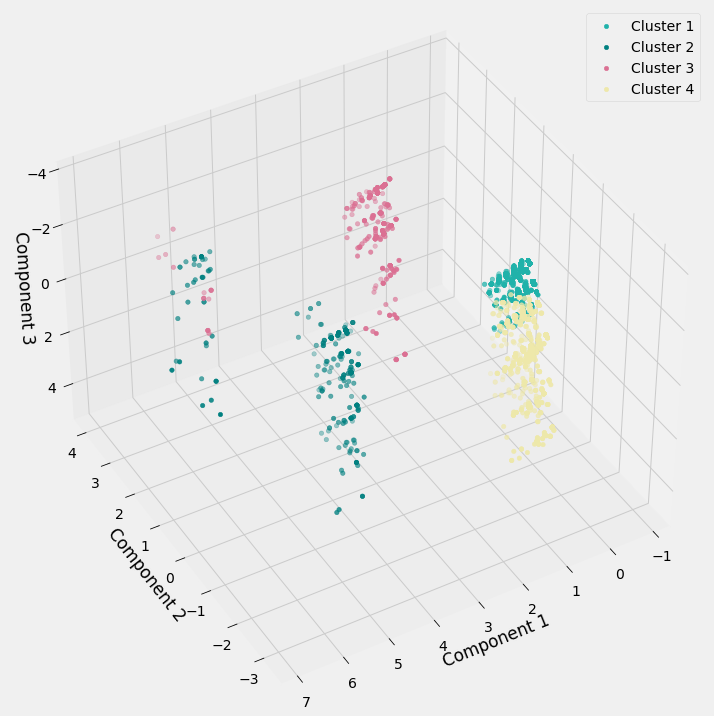

In [47]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(dfplot[dfplot["Cluster"]==0]["C1"], dfplot[dfplot["Cluster"]==0]["C2"],dfplot[dfplot["Cluster"]==0]["C3"], c="lightseagreen", label="Cluster 1")
ax.scatter(dfplot[dfplot["Cluster"]==1]["C1"], dfplot[dfplot["Cluster"]==1]["C2"],dfplot[dfplot["Cluster"]==1]["C3"], c="teal", label="Cluster 2")
ax.scatter(dfplot[dfplot["Cluster"]==2]["C1"], dfplot[dfplot["Cluster"]==2]["C2"],dfplot[dfplot["Cluster"]==2]["C3"], c="palevioletred", label="Cluster 3")
ax.scatter(dfplot[dfplot["Cluster"]==3]["C1"], dfplot[dfplot["Cluster"]==3]["C2"],dfplot[dfplot["Cluster"]==3]["C3"], c="palegoldenrod", label="Cluster 4")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')


#ax.view_init(-160, 140) # just testing soma angles
#ax.view_init(-160, 20) # see well the yellow cluster
ax.view_init(-140, 120) #ssee well clusters 1 and 4
plt.legend()
plt.show()

# Clustering with 5 principal components

In [48]:
dffeatures = df[['C1', 'C2','C3', 'C4', 'C5']]

In [49]:
sc = StandardScaler()
dffeatures_Sc = sc.fit_transform(dffeatures)

## DBSCaN with the 5 principal components (4 clusters)

Again we get 46 clusters and a low silhouette score, even after optimizing the parameters. DBSCAN is hence not the best algo

Optimizing the hyperparameters

range_min = [x for x in range(2, 51, 4)]
range_eps = [x / 100.0 for x in range(1, 51, 4)]
#range_eps = [x / 100.0 for x in range(1, 51, 4)] + [y / 10.0 for y in range(1, 51, 4)] + [round(z, 2) for z in np.arange(1.10, 1.31, 0.01)]
dic = {}
for m in range_min:

    for e in range_eps:

        model_1 = DBSCAN(eps = e, min_samples = m).fit(dffeatures_Sc)

        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)

        core_samples_mask[model_1.core_sample_indices_] = True
        labels = model_1.labels_

        if len( set(labels) ) > 1:

            silhouette_Avg = silhouette_score(dffeatures_Sc, labels)

            if silhouette_Avg > 0:

                dic[str(m) + " - " + str(e)] = silhouette_Avg

                print("min-sample value is: " + str(m) + " eps value is: " + str(e) , "The avearge silhouette_score is :",                               silhouette_Avg)
                max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])

Running the clustering algo

In [50]:
clustering = DBSCAN(eps=0.9, min_samples=2).fit(dffeatures_Sc) # was eps 0.5, min=5

In [51]:
labels = clustering.labels_

In [52]:
frame = pd.DataFrame(dffeatures_Sc)
frame['cluster'] = labels
frame.columns = ['C1', 'C2', "C3","C4", "C5", 'cluster']

In [53]:
#silhouette measure of performance of the clustering method
silhouette_score(dffeatures_Sc, clustering.labels_, metric='euclidean')

0.21231927901929298

In [54]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_
# there are 4 clusters

46

In [55]:
n_noise_ = list(labels).count(-1)
n_noise_
#5 observations are "noise" and hence not used in the algo

35

## K-means with 5 components  (6 clusters)

#### chosing the apropriate number of clusters - Elbow method

In [56]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dffeatures_Sc)
    sse.append(kmeans.inertia_)

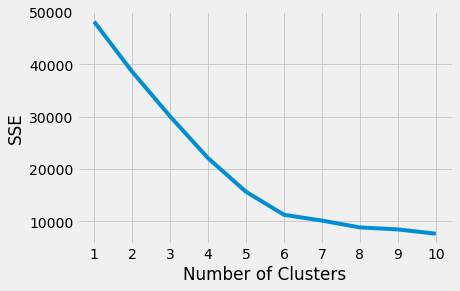

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The appropriate number of clusters is 6

In [58]:
kmeans = KMeans(
init="random",
n_clusters=6,
n_init=500,
max_iter=300,
random_state=42
)

In [59]:
kmeans.fit(dffeatures_Sc)

KMeans(init='random', n_clusters=6, n_init=500, random_state=42)

In [60]:
kmeans.cluster_centers_
#based on the cluster centers, I can see what each cluster repreents (comparing the center for each component and each cluster)

array([[-0.64935175,  0.42801219, -0.0538712 ,  0.11421768, -0.38166172],
       [ 3.10250761,  1.81717101,  2.41224678, -1.31541329, -1.37212272],
       [ 0.32400598, -1.30918045,  1.48347055,  1.94234604,  0.43038952],
       [-0.19723238,  0.26618991,  0.11868328, -0.61463529,  1.40240831],
       [ 0.27318108, -1.18991731, -0.53741647, -0.77002907, -0.45754854],
       [ 2.334782  ,  1.13353131, -2.840055  ,  1.9191907 ,  0.58463928]])

In [61]:
#silhouette measure of performance of the clustering method
silhouette_score(dffeatures_Sc, kmeans.labels_, metric='euclidean')

0.5442850149273177

## Goegraphical & population analysis of the clusters

In [77]:
#set up again
dffeatures = df[['C1', 'C2']]
sc = StandardScaler()
dffeatures_Sc = sc.fit_transform(dffeatures)

K-means clustering (2 components, 3 clusters)

In [64]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=1000,
max_iter=1000,
random_state=42
)
kmeans.fit(dffeatures_Sc)
kmeans.cluster_centers_

array([[ 0.317702  , -1.20853501],
       [-0.5597511 ,  0.42765695],
       [ 2.697032  ,  1.48033783]])

combining the datasets

In [78]:
labels = kmeans.labels_
frame = pd.DataFrame(dffeatures_Sc)
frame['cluster'] = labels
frame.columns = ['C1', 'C2', 'cluster']

In [79]:
dfx = pd.DataFrame(frame["cluster"])

In [80]:
dfx["cluster"].value_counts()

1    5747
0    3054
2     833
Name: cluster, dtype: int64

In [143]:
#manually one hot encoding the clusters into 3 distinct columns. 
#I do it manually so that cluster_nb_0 is always the cluster with 833 observations, which is our cluster of interest
#else the cluster numbers are unstable which is not handy for the following script
dfx["cluster_nb_0"]= 0
dfx["cluster_nb_0"][dfx['cluster'].map(dfx['cluster'].value_counts()) == 833]=1

C:\Users\ROXANN~1\AppData\Local\Temp/ipykernel_3360/3577405526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["cluster_nb_0"][dfx['cluster'].map(dfx['cluster'].value_counts()) == 833]=1


In [145]:
dfx["cluster_nb_1"]= 0
dfx["cluster_nb_1"][dfx['cluster'].map(dfx['cluster'].value_counts()) == 3054]=1

C:\Users\ROXANN~1\AppData\Local\Temp/ipykernel_3360/1267790759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["cluster_nb_1"][dfx['cluster'].map(dfx['cluster'].value_counts()) == 3054]=1


In [139]:
dfx["cluster_nb_2"]= 0
dfx["cluster_nb_2"][dfx['cluster'].map(dfx['cluster'].value_counts()) == 5747]=1

C:\Users\ROXANN~1\AppData\Local\Temp/ipykernel_3360/1793048140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["cluster_nb_2"][dfx['cluster'].map(dfx['cluster'].value_counts()) == 5747]=1


In [142]:
#checking
dfx["cluster_nb_2"].value_counts()

1    5747
0    3887
Name: cluster_nb_2, dtype: int64

In [149]:
#setting the index similar to X_train to be able to merge the datasets afterwards
df = df.rename(index=dict(zip(df.index.tolist(),dfx.index.tolist())))

In [150]:
#merging into 1 dataset
dffull = pd.concat([df, dfx], axis=1).reindex(dfx.index)

In [151]:
#save the dataset to excel
dffull.to_excel("df_2020_with_clusters.xlsx", index=False)

In [152]:
dffull.columns

Index(['X_uuid', 'population_group', 'district', 'governorate', 'weight',
       'year', 'critical_shelter', 'not_attending_formal', 'stress', 'crisis',
       'emergency', 'female_headed', 'single_headed', 'children_working',
       'ngo_assistance', 'child_married', 'imptoved_water_source',
       'insufficient_amount_water', 'fcs_Acceptable', 'fcs_Borderline',
       'fcs_Poor', 'hhs_Little to no hunger in the household (0-1)',
       'hhs_Moderate hunger in the household (2-3)',
       'hhs_Severe hunger in the household (4-6)', 'C1', 'C2', 'C3', 'C4',
       'C5', 'quintile', 'cluster', 'cluster_nb_0', 'cluster_nb_1',
       'cluster_nb_2'],
      dtype='object')

In [153]:
dffull[dffull["cluster_nb_0"]==1]

,X_uuid,population_group,district,governorate,weight,year,critical_shelter,not_attending_formal,stress,crisis,...,C1,C2,C3,C4,C5,quintile,cluster,cluster_nb_0,cluster_nb_1,cluster_nb_2
23,2eb6cf3a-8f21-400c-af8f-b59b09683cdb,idp_out_camp,al.falluja,al.anbar,0.215550,2020,1,0,0,0,...,3.120201,1.615961,-4.434180,2.722641,-0.497007,5,2,1,0,0
36,58abad0b-2698-48ca-aea9-0790424e255d,idp_out_camp,al.falluja,al.anbar,0.215550,2020,1,1,1,0,...,4.348656,2.223098,3.228143,-2.976397,-1.544067,5,2,1,0,0
37,58dd277e-3652-472e-86e2-8b7c3b992dd0,idp_out_camp,al.falluja,al.anbar,0.215550,2020,1,1,1,0,...,5.226643,0.571124,5.577346,0.095491,-0.898337,5,2,1,0,0
96,f42d8ec0-4571-4fd2-87cf-54aab86aca3a,idp_out_camp,al.falluja,al.anbar,0.215550,2020,1,0,1,1,...,4.141976,2.493616,3.495911,-2.912838,-1.627821,5,2,1,0,0
812,09e9eefc-db13-490b-9391-3d73021607fe,idp_out_camp,al.khalis,diyala,0.073496,2020,1,0,1,0,...,5.039305,0.545262,5.840585,0.376725,-0.735386,5,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,35a68285-13eb-4fc6-9733-425974abbf5e,idp_out_camp,al.nasiriya,thi.qar,0.036467,2020,0,0,1,0,...,8.690247,2.775238,2.538129,2.893863,0.729277,5,2,1,0,0
9612,9e1cc399-e734-470f-b194-90723933bd2b,idp_out_camp,al.nasiriya,thi.qar,0.036467,2020,0,0,1,1,...,3.557210,3.528836,3.844266,-2.448537,-1.378921,5,2,1,0,0
9616,ab7de567-4c33-4222-a00a-96873c4d9875,idp_out_camp,al.nasiriya,thi.qar,0.036467,2020,0,0,1,0,...,3.412034,3.372392,3.631933,-2.085406,-2.579142,5,2,1,0,0
9631,e7b60bc6-1f19-4ffa-8f16-7136c1d3eab9,idp_out_camp,al.nasiriya,thi.qar,0.036467,2020,0,0,1,0,...,3.505528,1.206972,-4.138317,2.377983,0.029297,5,2,1,0,0


In [154]:
dffull["C1"][dffull["cluster_nb_0"]==1].describe()

count    833.000000
mean       4.062177
std        1.409825
min        2.095631
25%        3.267677
50%        3.819297
75%        4.435198
max       10.279745
Name: C1, dtype: float64

In [155]:
dffull["C2"][dffull["cluster_nb_0"]==1].describe()

count    833.000000
mean       2.126491
std        1.369669
min       -2.534920
25%        1.168401
50%        2.537107
75%        3.243995
max        5.658836
Name: C2, dtype: float64

counting the number of occurence per governorate per cluster

In [156]:
#one hot encoding the cluster variable
dfa = pd.get_dummies(dffull["cluster"], prefix='cluster_nb')
dffull = pd.concat([dffull, dfa], axis=1)

In [157]:
dffull["n"] = 1

In [158]:
dfcluster1 = dffull[["governorate", "population_group", "n", "cluster",  "cluster_nb_0", "cluster_nb_1", "cluster_nb_2"]]

In [161]:
dfclustergeo = dfcluster1.groupby("governorate").sum()

col_list = ['cluster_nb_0', 'cluster_nb_1','cluster_nb_2'] #if KMEANS
count = -1
for col in col_list:
    dfclustergeo[col+"_proportion"] = (dfclustergeo[col]/dfclustergeo["n"]*100).map(lambda x: '%.1f' % x)
    count = count+1
              

ValueError: cannot reindex from a duplicate axis

In [160]:
dfclustergeo

,n,cluster,cluster_nb_0,cluster_nb_0,cluster_nb_1,cluster_nb_1,cluster_nb_2,cluster_nb_2
governorate,,,,,,,,
al.anbar,1178,995,28,211.0,211,939.0,939,28.0
al.basrah,54,48,0,6.0,6,48.0,48,0.0
al.najaf,110,102,5,13.0,13,92.0,92,5.0
al.qadissiya,60,57,1,4.0,4,55.0,55,1.0
al.sulaymaniyah,640,612,150,178.0,178,312.0,312,150.0
babil,60,58,2,4.0,4,54.0,54,2.0
baghdad,617,534,54,137.0,137,426.0,426,54.0
diyala,947,802,125,270.0,270,552.0,552,125.0
duhok,1164,529,121,756.0,756,287.0,287,121.0


#### Population groups

In [163]:
dfclusterpop = dfcluster1.groupby("population_group").sum()

In [164]:
#col_list = ['cluster_nb_-1', 'cluster_nb_0', 'cluster_nb_1','cluster_nb_2', 'cluster_nb_3'] #if DBSCAN
col_list = ['cluster_nb_0', 'cluster_nb_1','cluster_nb_2'] #if KMEANS
count = -1
for col in col_list:
    dfclusterpop[col+"_proportion"] = (dfclusterpop[col]/dfclusterpop["n"]*100).map(lambda x: '%.1f' % x)
    count = count+1
              

ValueError: cannot reindex from a duplicate axis

In [165]:
dfclusterpop

,n,cluster,cluster_nb_0,cluster_nb_0,cluster_nb_1,cluster_nb_1,cluster_nb_2,cluster_nb_2
population_group,,,,,,,,
idp_in_camp,2547,471,221,2297.0,2297,29.0,29,221.0
idp_out_camp,4387,4328,440,499.0,499,3448.0,3448,440.0
returnee,2700,2614,172,258.0,258,2270.0,2270,172.0


Interpretation:
We see that geographically, the clusters are distributed ok. Of course the first cluster is the largest, so a higher percentage of each governorate's observations are categorized in teh first cluster, but the spread is quite even.
Looking at population groups, we see that the picture is different: definitely IDP_IN_CAMPS are almost all cateogirzed in the second cluster which is not the case for either of the two other groups...
So the clusters do catch the population group a lot.

##  understanding what these clusters are

In [166]:
#cluster size:
dfcluster1.sum()

governorate         al.anbaral.anbaral.anbaral.anbaral.anbaral.anb...
population_group    idp_out_campidp_out_campidp_out_campidp_out_ca...
n                                                                9634
cluster                                                          7413
cluster_nb_0                                                      833
cluster_nb_0                                                     3054
cluster_nb_1                                                     3054
cluster_nb_1                                                     5747
cluster_nb_2                                                     5747
cluster_nb_2                                                      833
dtype: object

Done below: 
- Computing the means of each variable for each cluster, and the mean of the variable itself (unclustered). 
- Then computing the percentage difference between the mean of the variable and the mean of the cluster. 
- Excluding the variables that have no variance (mean smaller than 0.05 or larger than 0.95 but smaller than 1). 
- For each cluster, listing the top 10 variables for which the mean of thecluster (in %) is very different from the mean of the variable.

#### Computing the means per cluster for each variable

In [167]:
dfmeans = dffull.drop(["year","X_uuid", "governorate", "district", "weight", "population_group"], axis=1)
#we defined dffull earlier as the original df combined with the clusters assigned to each observation

In [168]:
dfmeans = dfmeans.groupby("cluster").mean()

In [169]:
dfmeans.rename({0:"Cluster1mean", 1:"Cluster2mean", 2:"Cluster3mean", 3:"Cluster4mean"}, inplace=True)
dfmeans = dfmeans.T

#### Computing the means of each variable

In [170]:
#importing the original dataset to compute the average of each variable
df1x = pd.read_excel("final_clean_v2.xlsx")
#df.to_excel("final_clean_v2.xlsx", index=False)

In [171]:
dfx = df1.copy()
dfx = dfx[dfx["year"]==2020] #selecting only 2020

In [172]:
dfx.rename({'principalcomponent1':"C1", 'principalcomponent2':"C2", 'principalcomponent3':"C3",
       'principalcomponent4':"C4", 'principalcomponent5':"C5"}, axis=1, inplace=True)
dfx = dfx.drop(["year","X_uuid", "governorate", "district", "weight", "population_group"], axis=1)

In [173]:
dfxmeans = pd.DataFrame(dfx.mean()) # computing the mean

#### Combining the datasets with all means

In [174]:
dfmeansfinal = pd.concat([dfmeans,dfxmeans],axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
dfmeansfinal.rename(columns={ dfmeansfinal.columns[3]: "Varmean" }, inplace=True) 

In [ ]:
dfmeansfinal.drop(["C1", "C2", "C3", "C4", "C5", "quintile", "cluster_nb_0", "cluster_nb_1", "cluster_nb_2", "n"], inplace=True)

In [ ]:
dfmeansfinal["C1perc"] = ((dfmeansfinal["Cluster1mean"]-dfmeansfinal["Varmean"])/dfmeansfinal["Varmean"])*100
dfmeansfinal["C2perc"] = ((dfmeansfinal["Cluster2mean"]-dfmeansfinal["Varmean"])/dfmeansfinal["Varmean"])*100
dfmeansfinal["C3perc"] = ((dfmeansfinal["Cluster3mean"]-dfmeansfinal["Varmean"])/dfmeansfinal["Varmean"])*100

In [175]:
dfmeansfinal.to_excel("finalmeanspercluster.xlsx", index=True)  

NameError: name 'dfmeansfinal' is not defined

In [97]:
dfmeansfinal

,Cluster1mean,Cluster2mean,Cluster3mean,Varmean,C1perc,C2perc,C3perc
critical_shelter,0.363745,0.788474,0.061771,0.318248,14.296286,147.754722,-80.590174
not_attending_formal,0.206483,0.186968,0.120759,0.149159,38.430988,25.347867,-19.040439
stress,0.752701,0.716110,0.624152,0.664418,13.287333,7.780096,-6.060338
crisis,0.171669,0.122790,0.160606,0.149574,14.771405,-17.907233,7.374997
emergency,0.157263,0.100851,0.084914,0.096222,63.438061,4.811417,-11.751866
female_headed,0.121248,0.310085,0.010962,0.115321,5.140238,168.889305,-90.494129
single_headed,0.132053,0.311067,0.019836,0.121860,8.364300,155.266085,-83.721957
children_working,0.046819,0.060576,0.046285,0.050862,-7.948649,19.100410,-8.997987
ngo_assistance,0.080432,0.233137,0.002436,0.082313,-2.284546,183.233367,-97.040487
child_married,0.013205,0.011133,0.009396,0.010276,28.504735,8.338129,-8.562570


#### Dropping all variables for which the average value of the variable is less than 0.05 or more than 0.95 but less than 1 (they are all dummies with not enough variance)

In [98]:
dfmeansfinalreduced = dfmeansfinal.copy()

In [99]:
todrop0 = dfmeansfinalreduced[(dfmeansfinalreduced["Varmean"]<0.05) | ((dfmeansfinalreduced["Varmean"]>0.95) & (dfmeansfinalreduced["Varmean"]<=1))].index
for col in todrop0:
    dfmeansfinalreduced.drop(col, axis=0, inplace=True)

In [100]:
dfmeansfinalreduced

,Cluster1mean,Cluster2mean,Cluster3mean,Varmean,C1perc,C2perc,C3perc
critical_shelter,0.363745,0.788474,0.061771,0.318248,14.296286,147.754722,-80.590174
not_attending_formal,0.206483,0.186968,0.120759,0.149159,38.430988,25.347867,-19.040439
stress,0.752701,0.716110,0.624152,0.664418,13.287333,7.780096,-6.060338
crisis,0.171669,0.122790,0.160606,0.149574,14.771405,-17.907233,7.374997
emergency,0.157263,0.100851,0.084914,0.096222,63.438061,4.811417,-11.751866
female_headed,0.121248,0.310085,0.010962,0.115321,5.140238,168.889305,-90.494129
single_headed,0.132053,0.311067,0.019836,0.121860,8.364300,155.266085,-83.721957
children_working,0.046819,0.060576,0.046285,0.050862,-7.948649,19.100410,-8.997987
ngo_assistance,0.080432,0.233137,0.002436,0.082313,-2.284546,183.233367,-97.040487
imptoved_water_source,0.049220,0.064833,0.059161,0.060100,-18.103200,7.875851,-1.561316


In [101]:
#absolute values
dfmeansfinalreduced["C1percabs"] = abs(dfmeansfinalreduced["C1perc"])
dfmeansfinalreduced["C2percabs"] = abs(dfmeansfinalreduced["C2perc"])
dfmeansfinalreduced["C3percabs"] = abs(dfmeansfinalreduced["C3perc"])

#### Cluster 1 - main differences

3000 observations classified in Cluster 1. HH that havent received aid. Classical HH structure (2 parents, male headed). Crisis level of food security, not enough water. Shelter better than average.

In [102]:
dfmeansfinalreduced.nlargest(10, ['C1percabs']).C1perc

emergency                63.438061
fcs_Acceptable          -56.106279
not_attending_formal     38.430988
imptoved_water_source   -18.103200
crisis                   14.771405
critical_shelter         14.296286
stress                   13.287333
single_headed             8.364300
children_working         -7.948649
female_headed             5.140238
Name: C1perc, dtype: float64

#### Cluster 2 - main differences

3054 observations classified in cluster 2. HH that received aid. They are mostly female and single headed. Critical shelter conditions. Better Food Security and water situation than average

In [103]:
dfmeansfinalreduced.nlargest(10, ['C2percabs']).C2perc

ngo_assistance               183.233367
female_headed                168.889305
single_headed                155.266085
critical_shelter             147.754722
insufficient_amount_water    -69.611901
not_attending_formal          25.347867
children_working              19.100410
crisis                       -17.907233
imptoved_water_source          7.875851
stress                         7.780096
Name: C2perc, dtype: float64

#### Cluster 3- main differences

833 observations in this cluster (= smallest cluster by far). Poorest group. Emergency level of food security, less educated than average, worse water access.

In [104]:
dfmeansfinalreduced.nlargest(10, ['C3percabs']).C3perc

ngo_assistance              -97.040487
female_headed               -90.494129
single_headed               -83.721957
critical_shelter            -80.590174
insufficient_amount_water    37.565724
not_attending_formal        -19.040439
emergency                   -11.751866
children_working             -8.997987
crisis                        7.374997
stress                       -6.060338
Name: C3perc, dtype: float64

## Forcer les cluster centers de 2020 sur les données de 2021 pour regarder si il y a une evolution

clearly this is not the correct way to look at how the clusters evolve over time. That's why we will go into supervised learning rather.

setting up again

In [105]:
#set up again
dffeatures = df[['C1', 'C2']]
sc = StandardScaler()
dffeatures_Sc = sc.fit_transform(dffeatures)

In [106]:
dflaterfeatures = dflater[['C1', 'C2']]
dflaterfeatures_Sc = sc.fit_transform(dflaterfeatures)

In [107]:
#defining the model and fitting it on 2020 data
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=1000,
max_iter=1000,
random_state=42
)
kmeans.fit(dffeatures_Sc)
kmeans.cluster_centers_

array([[ 2.69703203,  1.48033779],
       [ 0.31770182, -1.20853476],
       [-0.55975101,  0.42765683]])

In [108]:
#predicting on 2021 data
labels = kmeans.predict(dflaterfeatures_Sc)

In [109]:
labels

array([2, 2, 1, ..., 2, 1, 1])

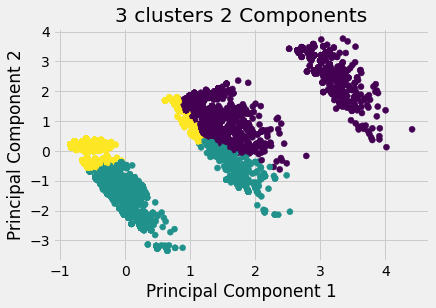

In [110]:
#plotting
plt.scatter(dflaterfeatures_Sc[:, 0], dflaterfeatures_Sc[:, 1], c=labels)
plt.title("3 clusters 2 Components")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [111]:
#making a dataframe with the 2 principal components and the cluster number
frame = pd.DataFrame(dflaterfeatures)
frame['cluster'] = labels

In [112]:
#making a dataframe with 2021 data, the 5 Principal components, and the cluster assigned
dflaterx = pd.DataFrame(frame["cluster"])
#merging into 1 dataset
dflaterfull = pd.concat([dflater, dflaterx], axis=1).reindex(dflaterx.index)

In [113]:
#one hot encoding the cluster variable
dflatera = pd.get_dummies(dflaterfull["cluster"], prefix='cluster_nb')
dflaterfull = pd.concat([dflaterfull, dflatera], axis=1)

Looking at the size of the clusters in 2021

In [114]:
dflatercluster1 = dflaterfull[["governorate", "population_group", "cluster",  "cluster_nb_0", "cluster_nb_1", "cluster_nb_2"]]
dflatercluster1.sum()
#6675 obs in the first cluster, 2643 in the second and 2771 in the 3rd

governorate         babildiyaladiyaladiyaladiyalakirkukal.sulayman...
population_group    idp_out_campreturneereturneereturneereturneeid...
cluster                                                         16920
cluster_nb_0                                                     2039
cluster_nb_1                                                     3180
cluster_nb_2                                                     6870
dtype: object

clearly the clustering graph is not very convincing (but it wasnt in 2020 either actually)